In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data=pd.read_csv("tweets_shuffled_no_links.csv", delimiter="\t", names=["UserID","TweetID","Tweet","CreatedAt","TweetNoLinks"], dtype=str)

In [5]:
data

,UserID,TweetID,Tweet,CreatedAt,TweetNoLinks
0,145052735,15802479121,@allisajacobs apparently not all dark chocolat...,2010-06-09 16:07:45,@allisajacobs apparently not all dark chocolat...
1,105579434,8125189479,"More (Steve) Jobs, Jobs, Jobs, Jobs: ... but l...",2010-01-23 15:55:17,"More (Steve) Jobs, Jobs, Jobs, Jobs: ... but l..."
2,21044418,1331133902,"Ajab nahare topi zadim, nafari 2ta qezel ba mo...",2009-03-15 07:18:41,"Ajab nahare topi zadim, nafari 2ta qezel ba mo..."
3,23745304,5873730898,Palin Confuses Iraq & Iran In Hannity Intervie...,2009-11-19 18:12:39,Palin Confuses Iraq & Iran In Hannity Intervie...
4,20135933,5717111863,"again, thank you for the sanity! RT @sineaddee...",2009-11-14 14:09:58,"again, thank you for the sanity! RT @sineaddee..."
5,15087325,5028483117,"Em SP quando ficava de saco cheio, eu pegava o...",2009-10-20 16:59:29,"Em SP quando ficava de saco cheio, eu pegava o..."
6,74433493,6426578069,Anyone Interested In Buying A Geo-Aware Social...,2009-12-07 03:39:04,Anyone Interested In Buying A Geo-Aware Social...
7,39270881,4646578604,Check this video out -- Jennifer Delano - Amst...,2009-10-05 22:26:01,Check this video out -- Jennifer Delano - Amst...
8,20881939,16518549431,remembered u said not to wait,2010-06-18 22:27:42,remembered u said not to wait
9,28019349,5945737657,Fiquei tão lhoc que coloquei o que não deveria...,2009-11-22 07:35:41,Fiquei tão lhoc que coloquei o que não deveria...


In [7]:
tweets = data.TweetNoLinks.values

array([ '@allisajacobs apparently not all dark chocolate is healthy. have you seen this? - ',
       'More (Steve) Jobs, Jobs, Jobs, Jobs: ... but lasting good jobs that keep America on the cutting edge. The best way... ',
       'Ajab nahare topi zadim, nafari 2ta qezel ba mokhalafat va kolli halva! Alan ham ke deraz keshidim, badesh mirim to bagh!',
       ..., 'Free Book: 101 Romantic Ideas! ',
       "I'm broadcasting my live Stickam stream at  started: Fri, 16:02 PST",
       'Went to Allsop property auction today.  Brilliant! There are real bargins to be had all over the UK.'], dtype=object)

In [8]:
def extract_hashtags(tweet):
    import re
    hashtags = re.findall(r"#(\w+)", tweet)
    return hashtags

In [135]:
hashtag_tweets_dict = {}
no_hashtags = []
for tweet in tweets:
    if not pd.isnull(tweet):
        hashtags = extract_hashtags(tweet)
        if len(hashtags) == 0:
            no_hashtags.append(tweet)
            continue
        for hashtag in hashtags:
            if hashtag in hashtag_tweets_dict:
                tweet_list = hashtag_tweets_dict[hashtag]
                tweet_list.append(tweet)
                hashtag_tweets_dict[hashtag] = tweet_list
            else:
                tweet_list = [tweet]
                hashtag_tweets_dict[hashtag] = tweet_list

In [ ]:
def count_values(hashtag_tweets_dict):
    counts = {}
    for key, val in hashtag_tweets_dict.items():
        if len(val) >= 1000:
            counts[key] = len(val)
    return counts

In [50]:
y = counts.values()
x = range(len(y))

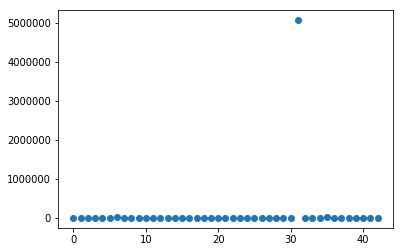

In [51]:
plt.scatter(x, y)
plt.show()

In [52]:
counts.keys()

['ad',
 'worldcup',
 'twitter',
 'followfriday',
 'tebakbandtranslate',
 '039',
 'FF',
 'fail',
 'politics',
 'musicmonday',
 'Jobs',
 'business',
 'ff',
 'travel',
 'FollowFriday',
 '1',
 '3',
 '2',
 'music',
 'MusicMonday',
 'health',
 'jobs',
 'justbecause',
 'tcot',
 'quote',
 'photography',
 'NFL',
 'tlot',
 'iranelection',
 'fb',
 'beatcancer',
 'no_hashtags',
 'news',
 'whatsbetter',
 'p2',
 '39',
 'theresway2many',
 'epicpetwars',
 'MM',
 'nowplaying',
 'tinychat',
 'shoutout',
 'shjobs']

In [55]:
counts["no_hashtags"]

5061087

In [57]:
np.sum(counts.values())-counts["no_hashtags"]

129417

In [58]:
hashtag_tweets_dict["no_hashtags"]

['@allisajacobs apparently not all dark chocolate is healthy. have you seen this? - ',
 'More (Steve) Jobs, Jobs, Jobs, Jobs: ... but lasting good jobs that keep America on the cutting edge. The best way... ',
 'Ajab nahare topi zadim, nafari 2ta qezel ba mokhalafat va kolli halva! Alan ham ke deraz keshidim, badesh mirim to bagh!',
 'Palin Confuses Iraq & Iran In Hannity Interview (VIDEO)  // Iran/Iraq, Tomato/Potato she is so EASILY confused',
 'Em SP quando ficava de saco cheio, eu pegava o carro e ia dar uma volta. Aqui na praia eu pego o caiaque e vou dar um rol\xc3\xaa!!',
 'Anyone Interested In Buying A Geo-Aware Social IM Service? ',
 'Check this video out -- Jennifer Delano - Amsterdam ',
 'remembered u said not to wait',
 'Fiquei t\xc3\xa3o lhoc que coloquei o que n\xc3\xa3o deveria colocar no subnick, merda.',
 'Kleinanzeigen - IBM Workpad ',
 "Friendfeed users, follow me and i'll do the same  THANKS",
 '>>> Organic Baby Products   <<<',
 'just spent the day with Ron LeGrand

In [111]:
hashtag_labeled_tweets = []
for hashtag_tweet in hashtag_tweets_dict.values():
    for tweet in hashtag_tweet:
        hashtag_labeled_tweets.append(tweet)

In [131]:
hashtags_tweets_dict_clone = hashtag_tweets_dict.copy()

In [133]:
def get_hashtags_from_tfidf(tfidf, threshold = 0.8):
    from sklearn.metrics.pairwise import linear_kernel
    for idx in range(0, len(hashtag_labeled_tweets)):
        new_tweet = tfidf[idx:idx+1]
        if (not "#" in hashtag_labeled_tweets[idx]):
            # we have to infer a hashtag according to related tweets
            cosine_similarities = linear_kernel(new_tweet, tfidf).flatten()
            related_docs_indices = cosine_similarities.argsort()[:-3:-1]
            for i in related_docs_indices:
                if cosine_similarities[i] > threshold:
                    related_tweet = hashtag_labeled_tweets[i]
                    if "#" in related_tweet:
                        hashtags = extract_hashtags(related_tweet)
                        print("hashtags for ",hashtag_labeled_tweets[idx],"are\t", hashtags, "\tsimilarity:",cosine_similarities[i])
                        for hashtag in hashtags:
                            tweets_list = hashtags_tweets_dict_clone[hashtag]
                            tweets_list.append(new_tweet)
                            hashtags_tweets_dict_clone[hashtag] = tweets_list


In [127]:
tfidf = TfidfVectorizer().fit_transform(hashtag_labeled_tweets)

In [134]:
get_hashtags_from_tfidf(tfidf)

('hashtags for ', 'Ehre wem Ehre geb\xc3\xbchrt - die Gewinner des Gucken - Denken - Feuer Frei"-Awar', 'are\t', ['award', 'ehre', 'karikatur'], '\tsimilarity:', 0.85952151195010373)
('hashtags for ', '@JanetJackson i love u so much', 'are\t', ['JanetJackson'], '\tsimilarity:', 0.85689703259388617)
('hashtags for ', "Katona 'stalked by Facebook friend' ", 'are\t', ['39', '39'], '\tsimilarity:', 0.86312135046161176)
('hashtags for ', 'NEW MOON O/', 'are\t', ['New', 'New', 'New', 'New', 'New', 'New', 'New', 'New', 'New'], '\tsimilarity:', 1.0)
('hashtags for ', 'NEW MOON O/', 'are\t', ['New', 'New', 'New', 'New', 'New', 'New', 'New', 'New', 'New'], '\tsimilarity:', 1.0)
('hashtags for ', 'fome :S', 'are\t', ['FOME'], '\tsimilarity:', 1.0)
('hashtags for ', 'How can we help Haiti?', 'are\t', ['Haiti'], '\tsimilarity:', 0.92561968678367212)
('hashtags for ', '\xe2\x96\xbaCheck out the 2010 Debut Collection of Sinfully Sweet Couture\xe2\x80\xa6it\xe2\x80\x99s HOT!\xe2\x96\xba ', 'are\t', ['

('hashtags for ', 'New blog post: \xe0\xa4\xb9\xe0\xa4\xb0 \xe0\xa4\xae\xe0\xa4\xb0\xe0\xa5\x8d\xe0\xa4\x9c \xe0\xa4\x95\xe0\xa5\x80 \xe0\xa4\x8f\xe0\xa4\x95 \xe0\xa4\xa6\xe0\xa4\xb5\xe0\xa4\xbe \xe0\xa4\xb9\xe0\xa5\x88, \xe0\xa4\x95\xe0\xa4\xbe\xe0\xa4\xb9\xe0\xa5\x87 \xe0\xa4\xa8 \xe0\xa4\x86\xe0\xa4\x9c\xe0\xa4\xae\xe0\xa4\xbe\xe0\xa4\x8f\xe0\xa4\x82....  ', 'are\t', ['tarakash'], '\tsimilarity:', 0.88504919817814942)
('hashtags for ', 'Published a new blog post: Healthy Eating Bad Eating ', 'are\t', ['8'], '\tsimilarity:', 0.90547575353251131)
('hashtags for ', 'FF @JWean @LakewoodLending @TonyAguilar1 @Century21Adobe @mmtgsolution @rickrobertson1 @MortgageMinute @RightMtgGuy  @kbotterman @njloanman', 'are\t', ['FF'], '\tsimilarity:', 0.95040475173952754)
('hashtags for ', 'Oh, yeah, the cleaning lady comes to the Queendom today! It is my favorite day when all the royal toilets and... ', 'are\t', ['fb'], '\tsimilarity:', 0.89472701984615366)
('hashtags for ', 'Impact on you is ?', 

('hashtags for ', 'Precision Restorations is smoothing out the inside of the bed for the 1957 GMC pickup.   ', 'are\t', ['classiccars'], '\tsimilarity:', 0.93510108197179087)
('hashtags for ', 'One is left with the horrible feeling now that war settles nothing; that to win a war is as disastrous as to lose one. -Agatha Christie', 'are\t', ['quote', 'peace'], '\tsimilarity:', 0.88961292939362369)
('hashtags for ', " - Don't forget to write love on your arms today! @TWLOHA", 'are\t', ['twloha'], '\tsimilarity:', 0.8331360705413835)
('hashtags for ', ' Final Fantasy XIII ;P new ps3 game', 'are\t', ['ps3', 'games'], '\tsimilarity:', 0.85407814563261364)
('hashtags for ', 'Vartha replied on Thor Re: Re: My problem with this is... ', 'are\t', [], '\tsimilarity:', 0.82170074864113274)
('hashtags for ', 'academia *:', 'are\t', ['academia'], '\tsimilarity:', 1.0)
('hashtags for ', 'academia *:', 'are\t', ['academia'], '\tsimilarity:', 1.0)
('hashtags for ', 'Toughness is in the soul and spirit,

('hashtags for ', "Let's go Germany!!!", 'are\t', ['Germany'], '\tsimilarity:', 0.80408207735797332)
('hashtags for ', 'Daily: Phil Libin on the past, present, and future of Evernote: Filed under: Cool tools, Odds and ends, T.. ', 'are\t', ['applewire'], '\tsimilarity:', 0.88972866630059255)
('hashtags for ', 'RT RT @socceroos: What do mandarins and the Qantas Socceroos have in common?  ', 'are\t', ['sponsorship'], '\tsimilarity:', 0.94959792875492022)
('hashtags for ', 'Creed - With Arms Wide Open \xe2\x99\xab ', 'are\t', ['apple', 'movie', 'nowplaying'], '\tsimilarity:', 0.83374874482251349)
('hashtags for ', 'Finished with The Lovely Bones by Alice Sebold ', 'are\t', ['reading'], '\tsimilarity:', 0.88356152975053137)
('hashtags for ', 'I believe that if you show people the problems and you show them the solutions they will be moved to act.  Bill Gates', 'are\t', ['quote'], '\tsimilarity:', 0.97360278610055762)
('hashtags for ', 'I wanna thank god for waking me up dis morning', 'are\

('hashtags for ', 'Partiu!', 'are\t', ['partiu'], '\tsimilarity:', 1.0)
('hashtags for ', 'Partiu!', 'are\t', ['partiu'], '\tsimilarity:', 1.0)
('hashtags for ', '@jonasbrothers \xe2\x99\xa5', 'are\t', ['jonasbrothers', 'jonasbrothers', 'jonasbrothers', 'jonasbrothers', 'jonasbrothers', 'jonasbrothers', 'jonasbrothers', 'jonasbrothers', 'jonasbrothers'], '\tsimilarity:', 1.0)
('hashtags for ', '@jonasbrothers \xe2\x99\xa5', 'are\t', ['jonasbrothers', 'jonasbrothers', 'jonasbrothers'], '\tsimilarity:', 1.0)
('hashtags for ', 'Affiliate Marketing Tip Guide: ', 'are\t', ['4'], '\tsimilarity:', 0.85433213814278197)
('hashtags for ', 'DESIGN AND DESIGN: ', 'are\t', ['design'], '\tsimilarity:', 0.97347182497947293)
('hashtags for ', 'FNORD!', 'are\t', ['FNORD'], '\tsimilarity:', 1.0)
('hashtags for ', "Twitter as the Media Industry's Bellweather Company in 2010 | BNET ... ", 'are\t', ['Twitter', '039'], '\tsimilarity:', 0.93054482876255018)
('hashtags for ', 'Miley Cyrus never heard of Jay-Z

('hashtags for ', 'Beautiful morning today in Niseko with 65cms of pow dumped in the past 24hrs... :))) ', 'are\t', ['vidly'], '\tsimilarity:', 0.9459658862899083)
('hashtags for ', '\xe2\x96\xac\xc6\x92\xe0\xb9\x8f\xe2\x84\x93\xe2\x84\x93\xe0\xb9\x8f\xcf\x89\xe2\x96\xac\xe2\x96\xba @iFuckYoDaddy @iFuckYoDaddy @iFuckYoDaddy @iFuckYoDaddy @iFuckYoDaddy @iFuckYoDaddy @iFuckYoDaddy @iFuckYoDaddy @iFuckYoDaddy', 'are\t', ['FOLLOW', 'shesdatruth'], '\tsimilarity:', 0.98730181753864965)
('hashtags for ', 'H0ME; B0REd GHEDt @ DHA CEll BiShES! PAqE UNDA MAj0R C0NStRUCti0N, iLL D0 iT LAtA. ... ', 'are\t', ['39'], '\tsimilarity:', 0.85076354686777433)
('hashtags for ', "My momma always said life was like a box of chocolates. You never know what you're gonna get. ~Winston Groom, Forrest Gump~", 'are\t', ['classicmoviequotes'], '\tsimilarity:', 0.84741152674961739)
('hashtags for ', "Cyber Criminals 'Launching Twitter Attacks' ", 'are\t', ['39', '39'], '\tsimilarity:', 0.85263723096822575)
('hasht

('hashtags for ', 'Any fact facing us is not as important as our attitude toward it, for that determines our success or failure. - Norman Vincent Peale', 'are\t', ['attitude', 'success'], '\tsimilarity:', 1.0)
('hashtags for ', 'Setting your table image can make the difference between playing poker and playing winning poker. Many... read more: ', 'are\t', ['poker'], '\tsimilarity:', 0.89945176848121355)
('hashtags for ', 'Down\xe2\x80\x94Jay Sean -', 'are\t', ['nowplaying'], '\tsimilarity:', 0.87935795748668544)
('hashtags for ', "Tom Sommers's Profile  ", 'are\t', ['39'], '\tsimilarity:', 0.94621387148211933)
('hashtags for ', "Check out 'Panasonic Lumix DMC-FH20 14.1 MP Digital Camera with 8x Optical Image Stabilized Zoom and ...' by Panasonic ", 'are\t', ['1'], '\tsimilarity:', 0.89356935212199917)
('hashtags for ', "I'm gonna live forever, or die trying. - Joseph Heller (Catch 22)", 'are\t', ['Quote'], '\tsimilarity:', 0.91890462497295666)
('hashtags for ', 'RT @dominiquesexy1 RT@F

('hashtags for ', '\xe2\x96\xba  Blogchat \xe2\x80\x93 A Blogger\xe2\x80\x99s Hidden Twitter Resource! (social media) (plz RT/Digg/Comment)', 'are\t', ['Blogchat'], '\tsimilarity:', 0.99999999999999978)
('hashtags for ', '\xe2\x96\xba  Blogchat \xe2\x80\x93 A Blogger\xe2\x80\x99s Hidden Twitter Resource! (social media) (plz RT/Digg/Comment)', 'are\t', ['Blogchat'], '\tsimilarity:', 0.99999999999999978)
('hashtags for ', 'Tell me if i look cute in my new picture ', 'are\t', ['fb'], '\tsimilarity:', 0.9258162350315311)
('hashtags for ', '\xe2\x99\xab N\xc3\xb3s temos tempo pra errar Tempo de sobra pra perder e ganhar. Apenas mais uma fase e com o tempo,  O tempo volta ao normal...\xe2\x99\xab', 'are\t', ['nxzero'], '\tsimilarity:', 0.9619381525521864)
('hashtags for ', 'meeting up with a couple of pro active clients in the morning just preparing some info for them on ', 'are\t', ['HootSuite'], '\tsimilarity:', 0.82183153571218426)
('hashtags for ', 'Beyonce', 'are\t', ['Beyonce', 'Beyonc

('hashtags for ', 'The next Business Owners Forum is at The ICEHOUSE Thursday 17 September.  Topic is "Cashflow"  ', 'are\t', ['ICEHOUSE', 'Cashflow'], '\tsimilarity:', 0.82274435246675681)
('hashtags for ', 'RT @RealAKiedis: Only 1 out of 10 heroin addicts stay clean. Keep your loved ones close and never give up hope.', 'are\t', ['rhcp'], '\tsimilarity:', 0.92515385306937525)
('hashtags for ', 'Get the latest games and electronics for the holidays with a Free $1000 Best Buy Gift Card! ', 'are\t', ['nowplaying', 'thatsaNoNo'], '\tsimilarity:', 0.80925573581439791)
('hashtags for ', 'RT @TheEcoChic: Sprout Baby $25 GC giveaway AND COUPON CODE! @TheEcoChic  Giveaway ends Friday! Go enter!', 'are\t', ['clothdiapers'], '\tsimilarity:', 0.84881986546316557)
('hashtags for ', 'Oscar Arias Sanchez~ The more freedom we enjoy the greater the responsibility we bear toward others as well as ourselves.', 'are\t', ['TRB', 'quote'], '\tsimilarity:', 0.94979257000048767)
('hashtags for ', '!If not no

('hashtags for ', 'Celebrity First Tweets: First Words From 15 Celebrities On Twitter Including ... ', 'are\t', ['twitter'], '\tsimilarity:', 0.8278443180337457)
('hashtags for ', 'Ad: Ideal solutions for mobile professionals, travelers, or anyone who needs to keep their world connect ', 'are\t', ['ad'], '\tsimilarity:', 0.99999999999999978)
('hashtags for ', 'Ad: Ideal solutions for mobile professionals, travelers, or anyone who needs to keep their world connect ', 'are\t', ['ad'], '\tsimilarity:', 0.99999999999999978)
('hashtags for ', 'Ralph is working at smoothing out the sides of the bed for the 1957 GMC pickup.   ', 'are\t', ['classiccars'], '\tsimilarity:', 0.91571803082458381)
('hashtags for ', 'Spam net snared a quarter million bots, says conqueror: Putting the mega in Mega-D Herders behind the Mega-D bo.. ', 'are\t', ['tech'], '\tsimilarity:', 0.93816299913421675)
('hashtags for ', 'Boondocks at...Now. :)', 'are\t', ['Boondocks'], '\tsimilarity:', 0.87837706101359492)
('hasht

('hashtags for ', 'Lady Gaga Comic Books - Shazam!  ', 'are\t', ['fashion'], '\tsimilarity:', 0.93172705575739245)
('hashtags for ', 'Most viewed video of the day: madonna 1984 mtv interview early years HQ  Pls ReTweet!', 'are\t', ['madonna'], '\tsimilarity:', 0.82431740240588725)
('hashtags for ', 'Josh Kerr: KerrAzy Times Episode 14  DemonBlog', 'are\t', ['Surfing'], '\tsimilarity:', 0.81125216123104915)
('hashtags for ', 'fome', 'are\t', ['FOME'], '\tsimilarity:', 1.0)
('hashtags for ', 'Wellness am Valentinstag: Offenes Presseportal (Pressemitteilung) Am Valentinstag geht es aber noch st\xc3\xa4rker um das... ', 'are\t', ['Wellness'], '\tsimilarity:', 0.85390675440077324)
('hashtags for ', 'Let me sleep', 'are\t', [], '\tsimilarity:', 1.0)
('hashtags for ', 'Every day 20 banks are robbed. The average take is $2,500!', 'are\t', ['uselesinfo'], '\tsimilarity:', 0.84966826637770465)
('hashtags for ', 'Landed in Salt Lake City.', 'are\t', ['Salt'], '\tsimilarity:', 0.80624643220380077)

('hashtags for ', 'Chris Brown - Throwed  Plz ReTweet!', 'are\t', ['nowplaying'], '\tsimilarity:', 0.93881307325124053)
('hashtags for ', 'Released Afghan Mobile Guide at SingTel Singapore, Optus Australia and Airtel India at US$ 8,00 - ', 'are\t', ['in'], '\tsimilarity:', 0.85121880820995044)
('hashtags for ', 'Happening now: Grab big pics off Google Images the easy way ', 'are\t', ['google'], '\tsimilarity:', 0.86108811167264254)
('hashtags for ', 'uhul..', 'are\t', ['tommcflyontwitcam', 'mcflypower', 'brazilianpower'], '\tsimilarity:', 0.95967766664375198)
('hashtags for ', "all The Things (your man won't do)---Joe", 'are\t', ['MM'], '\tsimilarity:', 0.89262867605838125)
('hashtags for ', 'Happy Birthday Rahul Dravid! ', 'are\t', ['cricket', 'India'], '\tsimilarity:', 0.85587296422083425)
('hashtags for ', 'demi ', 'are\t', ['3'], '\tsimilarity:', 1.0)
('hashtags for ', 'segredo', 'are\t', ['Segredo'], '\tsimilarity:', 1.0)
('hashtags for ', 'ready or not- fugees', 'are\t', ['mm'], 

('hashtags for ', 'up ,', 'are\t', ['up'], '\tsimilarity:', 1.0)
('hashtags for ', 'Tea! Glorious TEA! =D', 'are\t', ['tea'], '\tsimilarity:', 0.83610946420015753)
('hashtags for ', 'Verizon to AT&T: Stop whining; start investing: Verizon Wireless says that AT&T is suing Verizon because it doe.. ', 'are\t', ['tech'], '\tsimilarity:', 0.92679542996335551)
('hashtags for ', 'OIH: ADDY\xc2\xae AWARDS ENTRY DROP OFF DEADLINE IS FRIDAY DEC. 11 ', 'are\t', ['OiH'], '\tsimilarity:', 1.0)
('hashtags for ', 'I dream of a better world\xe2\x80\xa6where chickens can cross the road without having their motives questioned', 'are\t', ['quote'], '\tsimilarity:', 0.83587810453111944)
('hashtags for ', 'hungry =/', 'are\t', ['hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry'], '\tsimilarity:', 1.0)
('hashtags for ', 'TUDO TEM LIMITE?! ', 'are\t', ['chega'], '\tsimilarity:', 0.80018391762

('hashtags for ', 'New article on how economic crisis affects fashion designers is on its way. Stay tuned..... ', 'are\t', ['fashion', 'business', 'economy'], '\tsimilarity:', 0.92524840156382826)
('hashtags for ', 'The Almost Daily 60 Second Job Search Tip  Number 1  ', 'are\t', ['2'], '\tsimilarity:', 0.83146114320372744)
('hashtags for ', 'FREE Character Reading With A Simple Quick Test at ', 'are\t', ['FREE', 'Test'], '\tsimilarity:', 1.0)
('hashtags for ', 'FREE Character Reading With A Simple Quick Test at ', 'are\t', ['FREE', 'Test'], '\tsimilarity:', 1.0)
('hashtags for ', "Lakers' Bryant won't let injuries slow him: Kobe Bryant hasn't been trapped in a fancy Los Angeles building and.. ", 'are\t', ['39'], '\tsimilarity:', 0.88761543427492251)
('hashtags for ', 'Harggard Latin America Tour 2009  , el 21-12-09 en el Circo volador  \\m/  RT pls', 'are\t', ['yeah'], '\tsimilarity:', 0.98344829165248171)
('hashtags for ', 'Chilllin.', 'are\t', ['39'], '\tsimilarity:', 0.861648041635

('hashtags for ', "Microsoft's Bing seals Facebook, Twitter deals: While Steve Ballmer, Microsoft CEO, was in Toronto to pitch his com... ", 'are\t', ['39'], '\tsimilarity:', 0.95655006758032568)
('hashtags for ', 'Cool Design Opportunity @99designs: Design an official t-shirt for the LA Marathon ', 'are\t', ['design'], '\tsimilarity:', 0.92929855879081202)
('hashtags for ', 'Quick Weightloss! Lose 10 Lbs In 4 Days. ', 'are\t', ['food'], '\tsimilarity:', 0.94423960317716504)
('hashtags for ', 'PLR How To Videos \xe2\x80\x93 60% Commission. ', 'are\t', ['Commission', 'Videos'], '\tsimilarity:', 0.91062126318109482)
('hashtags for ', '@amysingermay thanks for the follow (: You good?!', 'are\t', ['follow'], '\tsimilarity:', 0.84997490098950212)
('hashtags for ', 'Google Music Search: 3 Major Implications for the Music Business ', 'are\t', ['mashable'], '\tsimilarity:', 0.83769541117573132)
('hashtags for ', 'CNN News : Storm batters Europe, at least 51 dead ', 'are\t', ['cnn'], '\tsimilar

('hashtags for ', 'Get your filthy hands off me!', 'are\t', ['ecademy'], '\tsimilarity:', 0.83649309254303916)
('hashtags for ', "@ThaBookie  thanks for the suggestion I read it the week it came out. Always enjoyed JK's story line. Have you read Twilight?", 'are\t', ['thabookie'], '\tsimilarity:', 0.97503378849096545)
('hashtags for ', 'Beyonce', 'are\t', ['Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce', 'Beyonce'], '\tsimilarity:', 1.0)
('hashtags for ', 'smile :))', 'are\t', ['smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile'], '\tsimilarity:', 1.0)
('hashtags for ', 'smile :))', 'are\t', ['smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile'], '\tsimilarity:

KeyboardInterrupt: 

In [ ]:
counts_labeled_hashtags = count_values(hashtags_tweets_dict_clone)
y_labeled_hashtags = counts.values()
x_labeled_hashtags = range(len(y))
plt.scatter(x_labeled_hashtags, y_labeled_hashtags)
plt.show()

In [ ]:
import pickle
with open("hashtag_tweet_dict.txt", "wb") as fp:   #Pickling
    pickle.dump(hashtags_tweets_dict_clone, fp)